In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. ЗАГРУЗКА ДАННЫХ.

In [ ]:
df = pd.read_csv('adult.csv')
df.sample(3)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
4941,67,Private,142097,9th,5,Married-civ-spouse,Priv-house-serv,Wife,White,Female,0,0,6,United-States,<=50K
31376,52,Private,117674,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
12483,33,Private,185177,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,<=50K


## 2. ПЕРВИЧНЫЙ АНАЛИЗ:

### Анализ уникальных признаков

In [ ]:
# Рабочий класс, Образование, Семейное положение, Занятость, Отношение, Раса, Пол, Родина, Доход
columns_categ=['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country','income']
dict_columns_unique = {}
dict_nuique = {}
for col in columns_categ:
  dict_columns_unique.setdefault(col, df[col].unique())


In [ ]:
# Возраст, Непрерывное образование, Непрерывный прирост капитала, Непрерывная потеря капитала, количество часов в неделю
columns_quantitatively = ['age', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']
dict_quantitatively = {}
for col in columns_quantitatively:
  dict_quantitatively.setdefault(col, df[col].nunique())

In [ ]:
for col in columns_categ:
  dict_nuique.setdefault(col, df[col].nunique())

In [ ]:
# Названия уникальных признаков
dict_columns_unique

{'workclass': array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
        'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
       dtype=object),
 'education': array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
        'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
        '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
       dtype=object),
 'marital-status': array(['Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced',
        'Separated', 'Married-spouse-absent', 'Married-AF-spouse'],
       dtype=object),
 'occupation': array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?',
        'Other-service', 'Prof-specialty', 'Craft-repair', 'Adm-clerical',
        'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
        'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
       dtype=object),
 'relationship': array(['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife

In [ ]:
# Число уникальных категориальных признаков
dict_nuique

{'workclass': 9,
 'education': 16,
 'marital-status': 7,
 'occupation': 15,
 'relationship': 6,
 'race': 5,
 'gender': 2,
 'native-country': 42,
 'income': 2}

In [ ]:
# Число уникальных количественных признаков
dict_quantitatively

{'age': 74,
 'educational-num': 16,
 'capital-gain': 123,
 'capital-loss': 99,
 'hours-per-week': 96}

In [ ]:
# Количество неизвестных - '?'
no_workclass = df[df['workclass']=='?']['workclass'].count()
no_occupation = df.loc[df['occupation']=='?']['occupation'].count()
no_native_country = df.loc[df['native-country']=='?']['native-country'].count()
no_ = df.loc[(df['occupation']=='?') & (df['workclass']=='?')]['occupation'].count()
print(f'Количество неизвестных - Рабочий клас: {no_workclass}')
print(f'Количество неизвестных - Занятость: {no_occupation}')
print(f'Количество неизвестных - Страна: {no_native_country}')
print(f'Количество неизвестных признаков рабочий класс и занятость c логикой and: {no_}')

Количество неизвестных - Рабочий клас: 2799
Количество неизвестных - Занятость: 2809
Количество неизвестных - Страна: 857
Количество неизвестных признаков рабочий класс и занятость c логикой and: 2799


### Анализ пропусков

In [ ]:
df.shape

(48842, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
# Пропуски отсутствуют
df.isnull().mean()# sum()

,0
age,0.0
workclass,0.0
fnlwgt,0.0
education,0.0
educational-num,0.0
marital-status,0.0
occupation,0.0
relationship,0.0
race,0.0
gender,0.0


###Графики

In [ ]:
# В основном преобладают данные одной страны United-States ~ 90% из модели данный признак исключаю.
tabl_country=df['native-country'].value_counts(normalize=True).reset_index().head(5)
tabl_country

,native-country,proportion
0,United-States,0.897424
1,Mexico,0.019471
2,?,0.017546
3,Philippines,0.006040
4,Germany,0.004218


Квантиль 0.99 (выбросы): 489


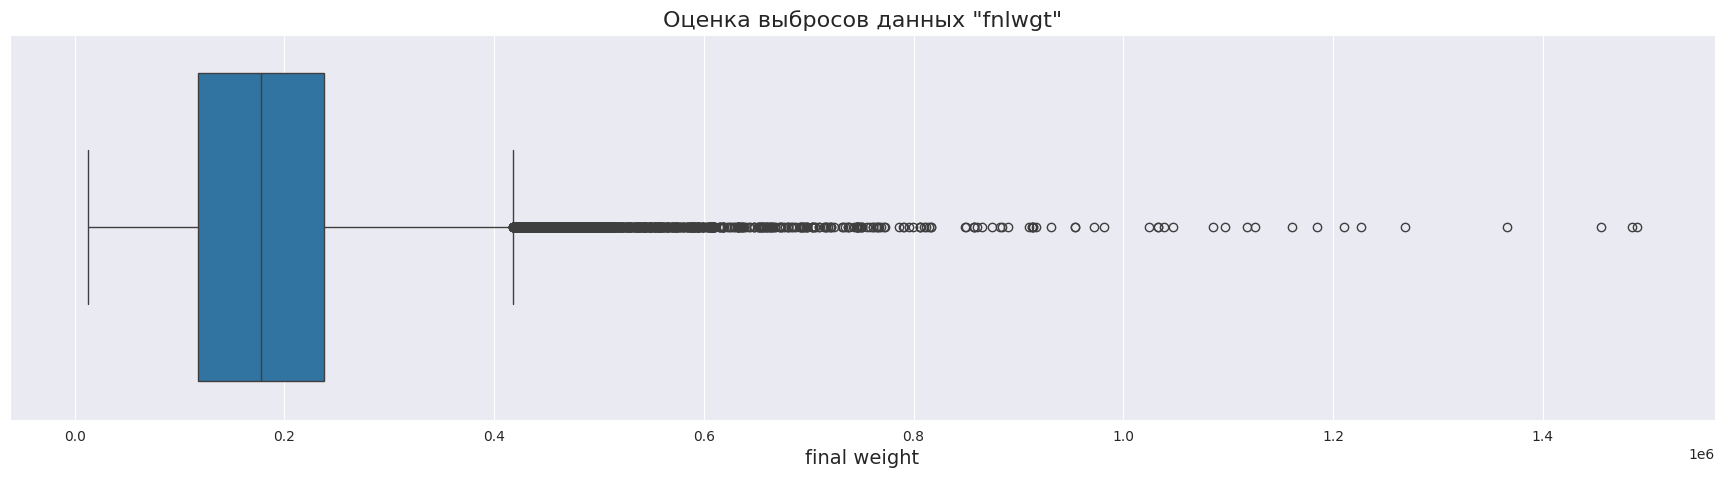

In [ ]:
outlier = df[df['fnlwgt']>df['fnlwgt'].quantile(0.99)]['fnlwgt'].count()
print(f'Квантиль 0.99 (выбросы): {outlier}')

plt.figure(figsize=[22, 5])
sns.set_style('darkgrid')
sns.boxplot(x=df['fnlwgt'])
plt.title('Оценка выбросов данных "fnlwgt"', size=16)
plt.xlabel('final weight', size = 14)
plt.show()

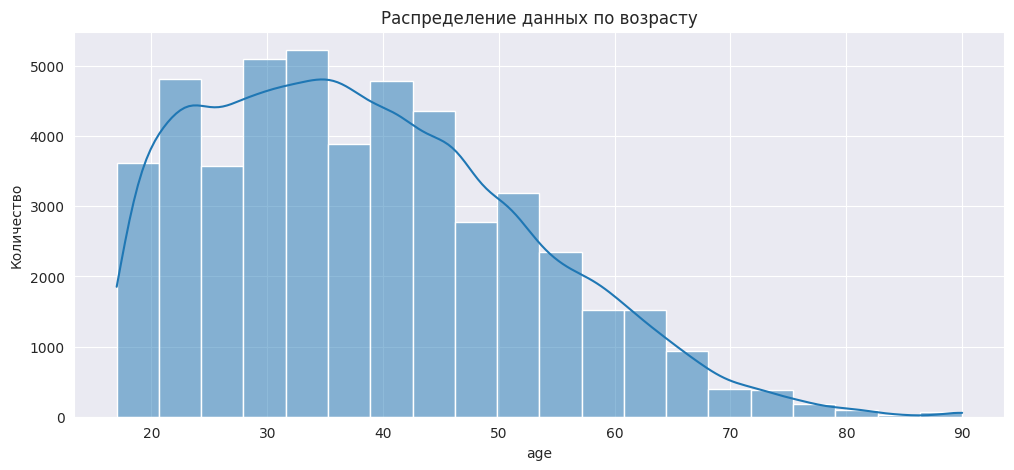

In [ ]:
plt.figure(figsize=(12, 5))
sns.histplot(data = df, x='age', kde=True, bins=20)
plt.title("Распределение данных по возрасту")
plt.ylabel("Количество")
plt.show()

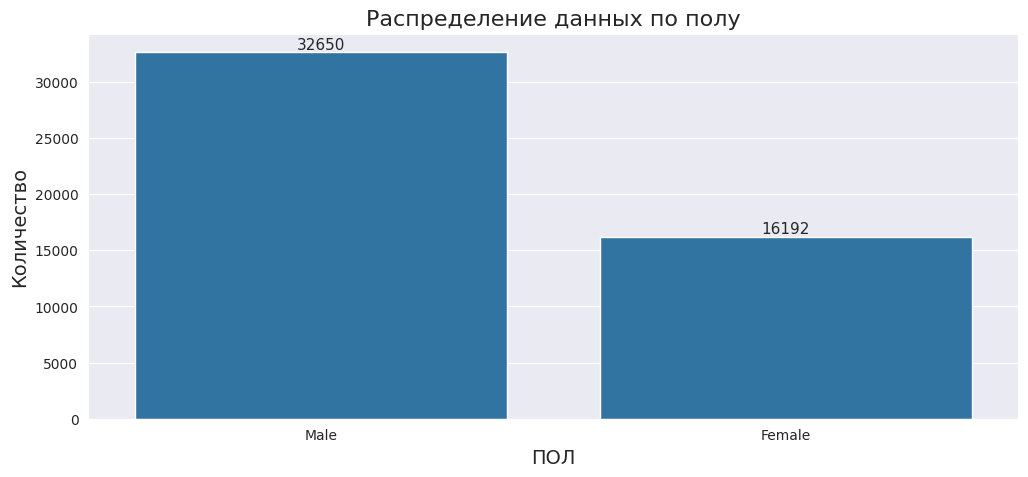

gender
Male      0.668482
Female    0.331518
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(12, 5))
chart = sns.countplot(data=df, x='gender')
chart.bar_label(chart.containers[0], size=11)
plt.title('Распределение данных по полу', size=16)
plt.xlabel('ПОЛ', size=14)
plt.ylabel('Количество', size=14)
plt.show()

print(df['gender'].value_counts(normalize=True))

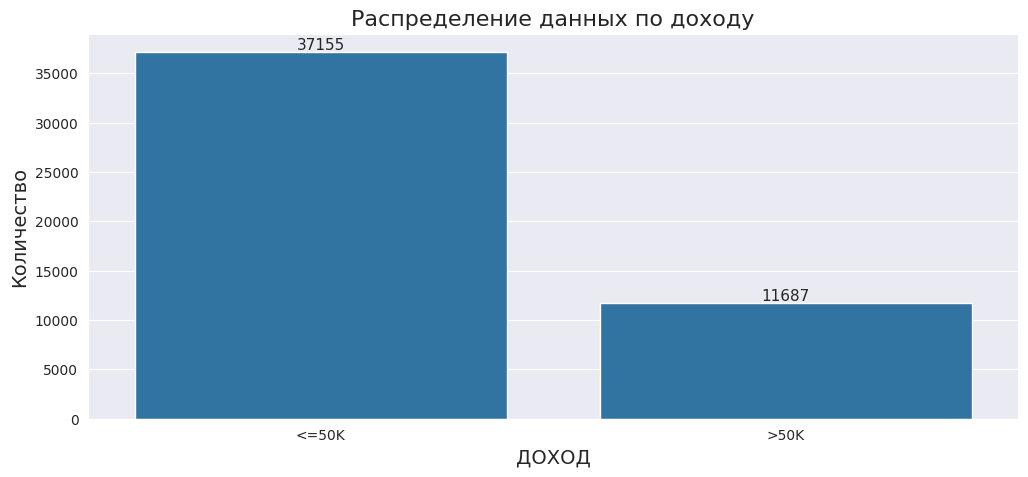

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64


In [ ]:
plt.figure(figsize=(12, 5))
chart=sns.countplot(data=df, x='income')
chart.bar_label(chart.containers[0], size=11)
plt.title('Распределение данных по доходу', size=16)
plt.xlabel('ДОХОД', size=14)
plt.ylabel('Количество', size=14)
plt.show()

print(df['income'].value_counts(normalize=True))

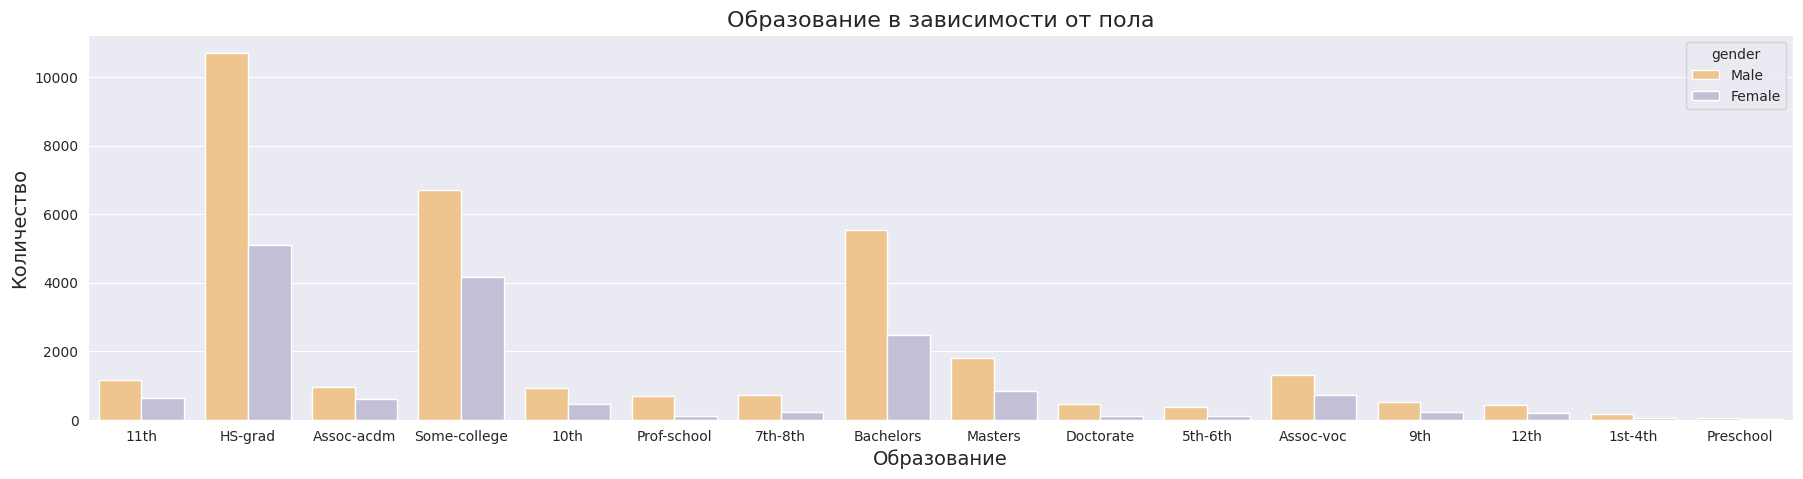

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(22, 5))
sns.countplot(data=df, x='education', hue='gender', palette="PuOr")
plt.title('Образование в зависимости от пола', size=16)
plt.xlabel('Образование', size=14)
plt.ylabel('Количество', size=14)
plt.show()

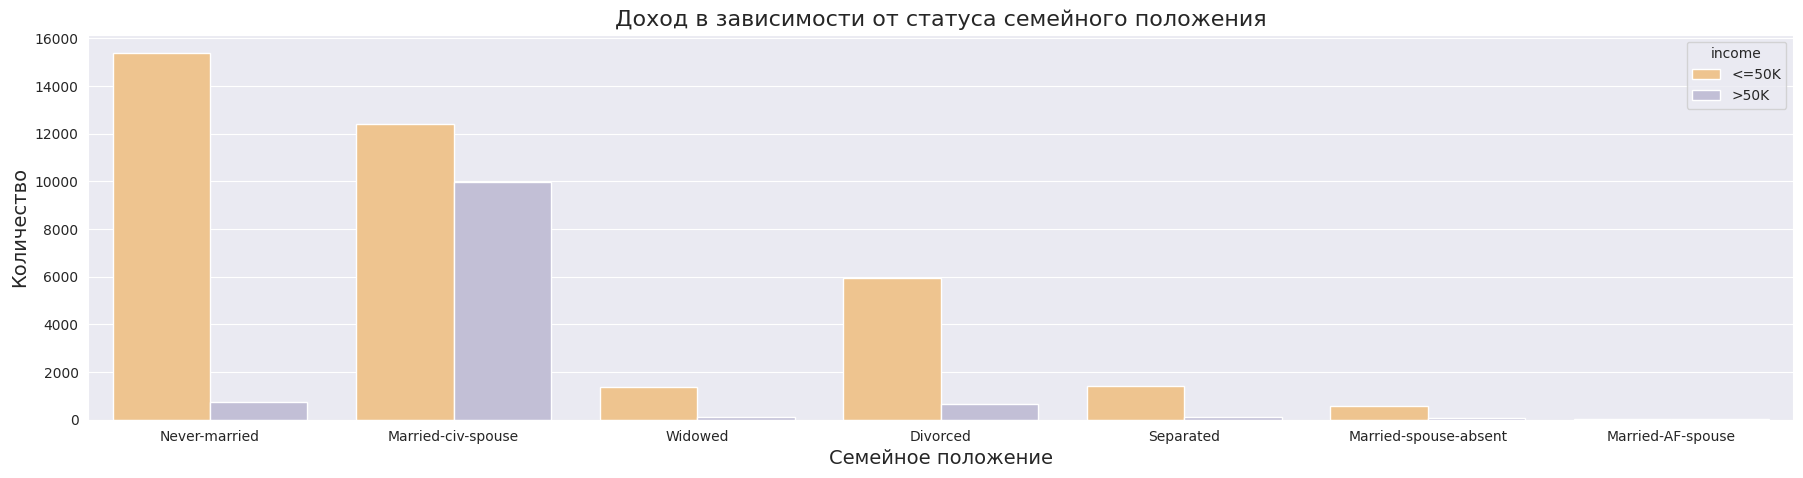

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(22, 5))
sns.countplot(data=df, x='marital-status', hue='income', palette="PuOr")
plt.title('Доход в зависимости от статуса семейного положения', size=16)
plt.xlabel('Семейное положение', size=14)
plt.ylabel('Количество', size=14)
plt.show()

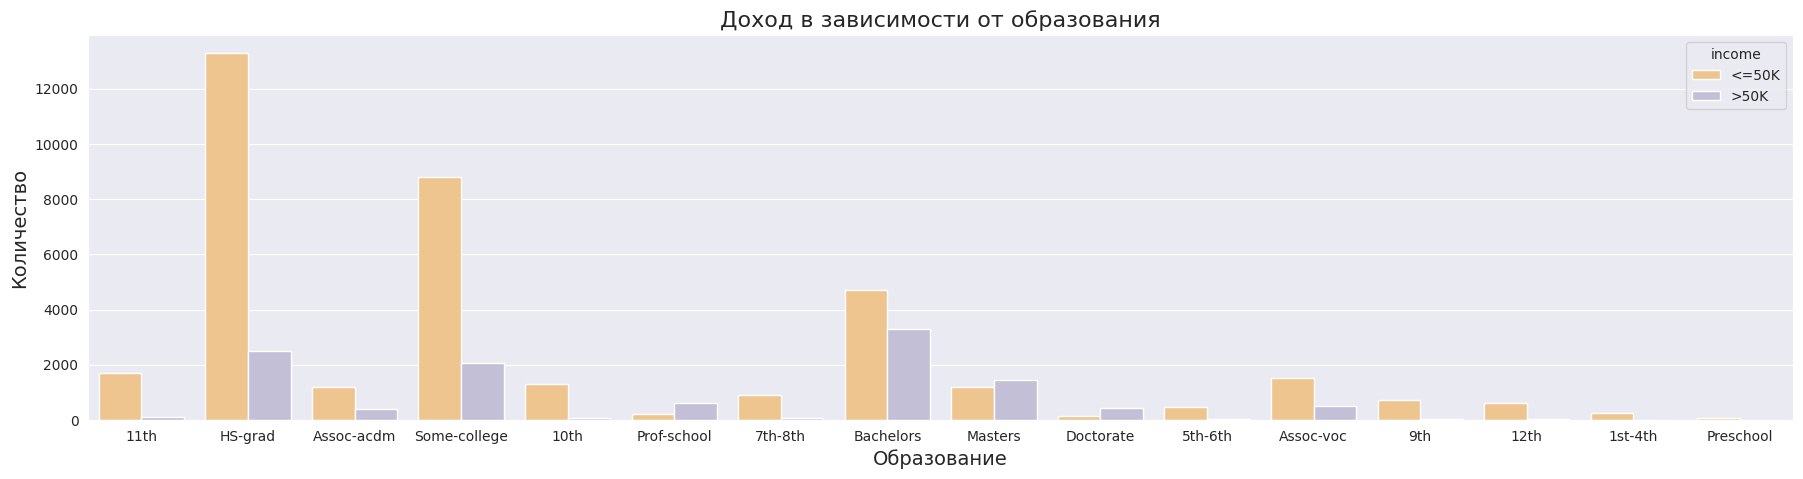

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(22, 5))
sns.countplot(data=df, x='education', hue='income', palette="PuOr")
plt.title('Доход в зависимости от образования', size=16)
plt.xlabel('Образование', size=14)
plt.ylabel('Количество', size=14)
plt.show()

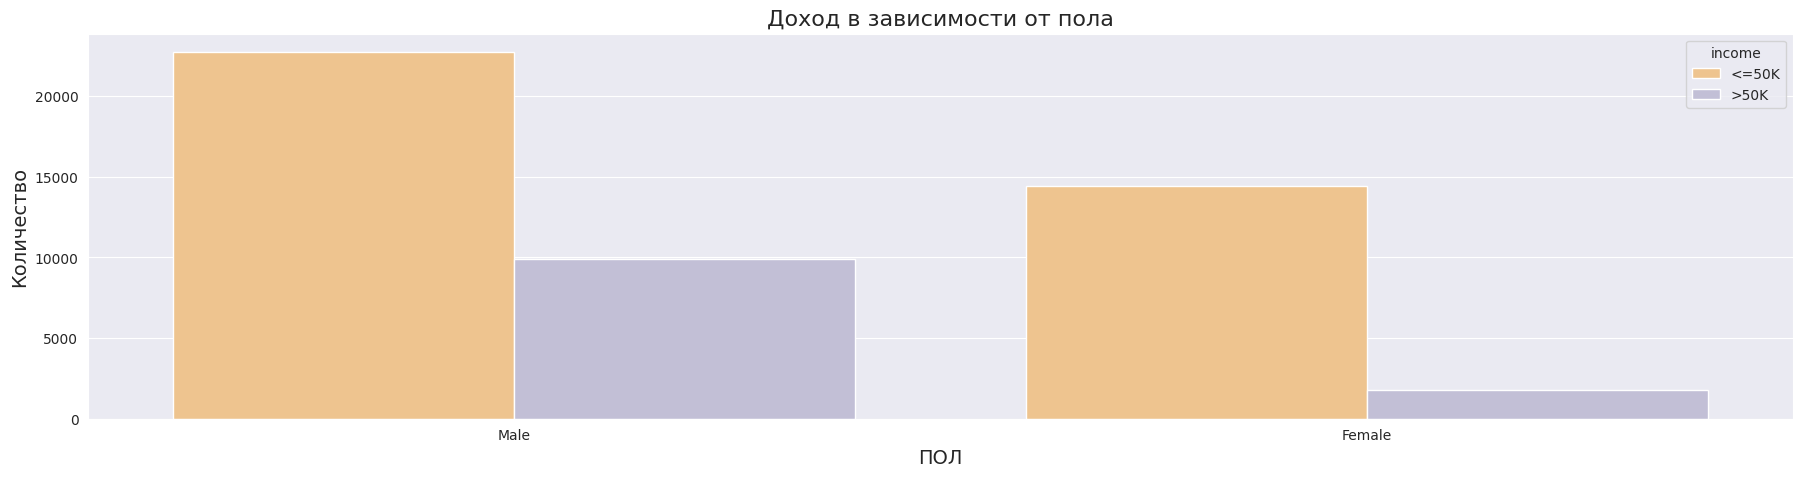

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(22, 5))
sns.countplot(data=df, x='gender', hue='income', palette="PuOr")
plt.title('Доход в зависимости от пола', size=16)
plt.xlabel('ПОЛ', size=14)
plt.ylabel('Количество', size=14)
plt.show()

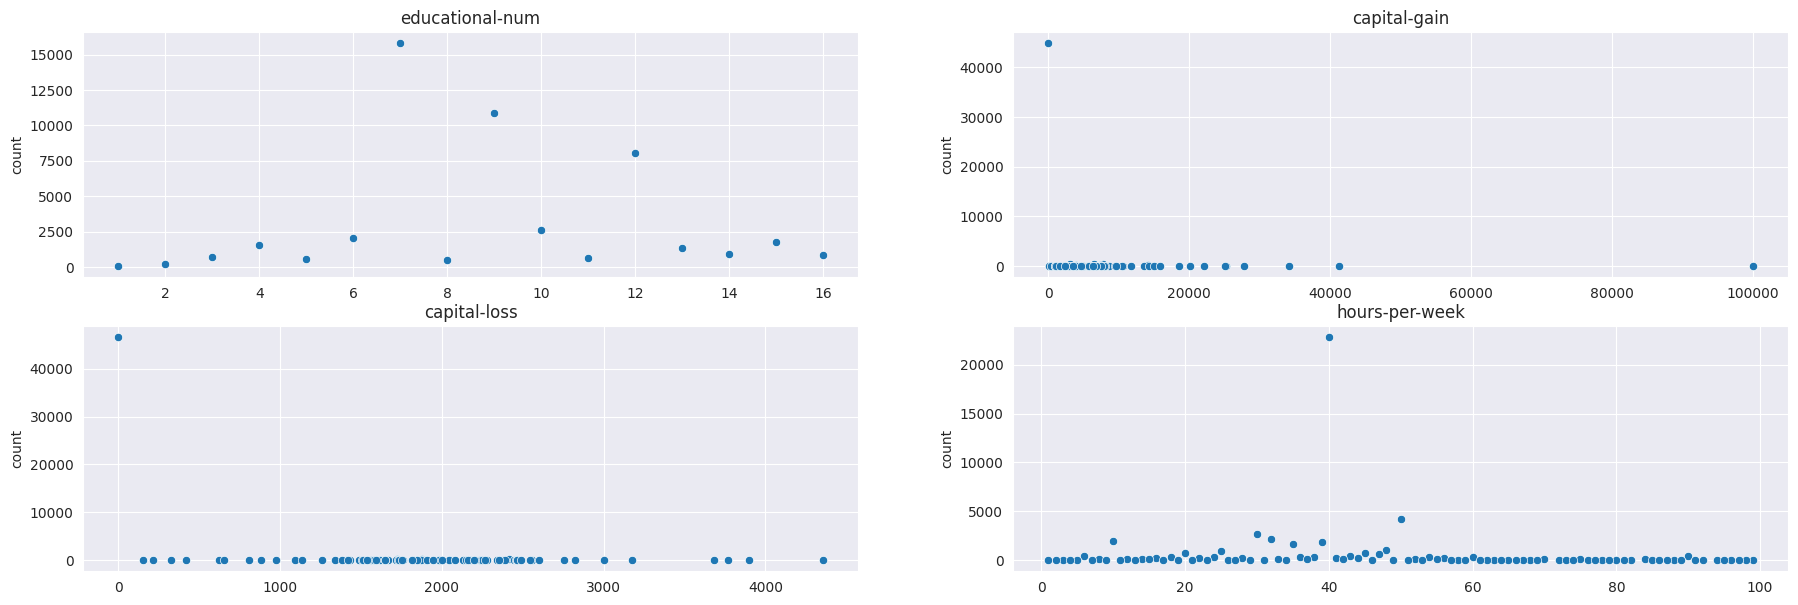

In [ ]:
#Графики встречаемости отдельных признаков колличественных данных. С учётом распространённости признаков в модель включу только "educational-num" - непрерывное образование
plt.figure(figsize=(22, 7))
plt.subplot(2,2,1)
sns.scatterplot(x=df['educational-num'].unique(), y=df['educational-num'].value_counts())
plt.title('educational-num')
plt.subplot(2,2,2)
sns.scatterplot(x=df['capital-gain'].unique(), y=df['capital-gain'].value_counts())
plt.title('capital-gain')
plt.subplot(2,2,3)
sns.scatterplot(x=df['capital-loss'].unique(), y=df['capital-loss'].value_counts())
plt.title('capital-loss')
plt.subplot(2,2,4)
sns.scatterplot(x=df['hours-per-week'].unique(), y=df['hours-per-week'].value_counts())
plt.title('hours-per-week')
plt.show()

###Преобразование категориальных признаков

In [ ]:
# Рабочий класс, Образование, Семейное положение, Занятость, Отношение, Раса, Пол
cols_categ=['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'gender']

In [ ]:
# Возраст, Непрерывное образование, Непрерывный прирост капитала, Непрерывная потеря капитала, количество часов в неделю
cols_quantitatively = ['age', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']

In [ ]:
# Т.к планирую включить ВСЕ признаки формирую датафрейм с данными без - '?'. Удаляются 2809 строк
df1=df.loc[~(df['occupation']=='?') & ~(df['workclass']=='?')]

In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Меры центральной тенденции существенно не поменялись
df1.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,46033.000000,4.603300e+04,46033.000000,46033.000000,46033.000000,46033.000000
mean,38.556601,1.898051e+05,10.128929,1114.332653,88.729346,40.948407
std,13.204268,1.054747e+05,2.564064,7589.571484,405.316932,12.011069
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176060e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783530e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.378650e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df1[['age', 'educational-num', 'capital-gain', 'capital-loss','hours-per-week']].corr(method='kendall')

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.053328,0.098283,0.049520,0.118519
educational-num,0.053328,1.000000,0.105291,0.068374,0.130234
capital-gain,0.098283,0.105291,1.000000,-0.065294,0.081036
capital-loss,0.049520,0.068374,-0.065294,1.000000,0.054052
hours-per-week,0.118519,0.130234,0.081036,0.054052,1.000000


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
OHE, LE = OneHotEncoder(), LabelEncoder()

In [ ]:
# ЦЕЛЕВАЯ ПЕРЕМЕННАЯ, ПРИЗНАК
Y = LE.fit_transform(df1['income'])
#df_y = pd.Series(Y)

In [ ]:
# ПРИЗНАКИ КОТОРЫЕ Я ВКЛЮЧИЛ
df_x = df1[['educational-num', 'workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'gender']]

In [ ]:
X = OHE.fit_transform(df_x)

In [ ]:
# <46033x73 sparse matrix of type '<class 'numpy.float64'>'
# with 368264 stored elements in Compressed Sparse Row format>
X

<46033x73 sparse matrix of type '<class 'numpy.float64'>'
	with 368264 stored elements in Compressed Sparse Row format>

##3. РАЗДЕЛЕНИЕ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1982, stratify=Y)

## 4. МОДЕЛИ ЛОГИЧЕСКОЙ РЕГРЕССИИ И SVM. ОБУЧЕНИЕ

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
LR = LogisticRegression()

In [ ]:
LR.fit(x_train, y_train)

LogisticRegression()

In [ ]:
SVc = SVC(kernel='rbf', degree=3)

In [ ]:
SVc.fit(x_train, y_train)

SVC()

In [ ]:
y_predict_LR = LR.predict(x_test)

In [ ]:
y_predict_SVc = SVc.predict(x_test)

## 5. ПРЕДСКАЗАНИЯ ТОЧНОСТИ МОДЕЛИ

In [ ]:
LR.score(x_test, y_test)

0.8269794721407625

In [ ]:
SVc.score(x_test, y_test)

0.8293689584012165

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score_LR = accuracy_score(y_test, y_predict_LR)
accuracy_score_LR

0.8269794721407625

In [ ]:
accuracy_score_SVc = accuracy_score(y_test, y_predict_SVc)
accuracy_score_SVc

0.8293689584012165

In [ ]:
difference_ml = round(((accuracy_score_SVc/accuracy_score_LR)-1)*100,5)
print(f'Точность модели SVC в сравнении с LR изменилась в % на: {difference_ml}')

Точность модели SVC в сравнении с LR изменилась в % на: 0.28894


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_predict_LR))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6923
           1       0.69      0.54      0.61      2284

    accuracy                           0.83      9207
   macro avg       0.78      0.73      0.75      9207
weighted avg       0.82      0.83      0.82      9207



## 6. ВЫВОДЫ О ПРОДЕЛАННОЙ РАБОТЕ

In [ ]:
"""
а. Из категориальных данных исключил - native-country. В основном преобладают данные одной страны United-States ~ 90%. Количество уникальных стран 42.
Семь категориальных признаков оставил. Было интересно как отработает модель. Мне кажется некоторые признаки делают модель "тяжёлой".
Из количественных данных исключил age, capital-loss, 'capital-gain', 'hours-per-week', ориентировался  на графики встречаемости(count) отдельных уникальных признаков.
Включил в модель только "educational-num" - непрерывное образование. Корреляция между количественными данными низкая.
Непрерывный количественный признак - fnlwgt так же исключил. Данный признак мне не понятен, много выбросов.

б. По точности модели разницы практически нет, но модель support vector class обрабатывает данные значительно дольше (~1,5 мин).

в. Обе модели справились. Для увеличения качества моделей требуется более грамотная предобработка данных.

* Возможно нужно применить частотные методы и/или включить топ самые распространённые признаки....
"""